#### Pandas Tutorial - Part 58: DataFrame Methods (between_time, bfill, bool, boxplot, cummin, cumprod)

This notebook covers several important DataFrame methods including:
- `between_time()` - Select values between particular times of the day
- `bfill()` - Backward fill missing values
- `bool()` - Return the boolean value of a single element
- `boxplot()` - Create box plots from DataFrame columns
- `cummin()` - Return cumulative minimum over a DataFrame axis
- `cumprod()` - Return cumulative product over a DataFrame axis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

##### 1. DataFrame.between_time()

The `between_time()` method selects values between particular times of the day (e.g., 9:00-9:30 AM).

In [2]:
# Create a DataFrame with DatetimeIndex
i = pd.date_range('2018-04-09', periods=4, freq='1D20min')
ts = pd.DataFrame({'A': [1, 2, 3, 4]}, index=i)
print("DataFrame with DatetimeIndex:")
ts

DataFrame with DatetimeIndex:


,A
2018-04-09 00:00:00,1
2018-04-10 00:20:00,2
2018-04-11 00:40:00,3
2018-04-12 01:00:00,4


In [3]:
# Select values between 0:15 and 0:45
print("Values between 0:15 and 0:45:")
ts.between_time('0:15', '0:45')

Values between 0:15 and 0:45:


,A
2018-04-10 00:20:00,2
2018-04-11 00:40:00,3


In [4]:
# Select values NOT between 0:15 and 0:45 by reversing the order
print("Values NOT between 0:15 and 0:45:")
ts.between_time('0:45', '0:15')

Values NOT between 0:15 and 0:45:


,A
2018-04-09 00:00:00,1
2018-04-12 01:00:00,4


In [5]:
# Create a more detailed DataFrame with different times
i = pd.date_range('2018-04-09', periods=24, freq='1H')
ts2 = pd.DataFrame({'A': range(24)}, index=i)
print("More detailed DataFrame (first 5 rows):")
ts2.head()

More detailed DataFrame (first 5 rows):


/var/folders/7y/fzwln1_93mn3js3wyk61_6xm0000gn/T/ipykernel_86072/150067693.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  i = pd.date_range('2018-04-09', periods=24, freq='1H')


,A
2018-04-09 00:00:00,0
2018-04-09 01:00:00,1
2018-04-09 02:00:00,2
2018-04-09 03:00:00,3
2018-04-09 04:00:00,4


In [6]:
# Select values between 9:00 and 17:00 (business hours)
print("Business hours (9:00-17:00):")
ts2.between_time('9:00', '17:00')

Business hours (9:00-17:00):


,A
2018-04-09 09:00:00,9
2018-04-09 10:00:00,10
2018-04-09 11:00:00,11
2018-04-09 12:00:00,12
2018-04-09 13:00:00,13
2018-04-09 14:00:00,14
2018-04-09 15:00:00,15
2018-04-09 16:00:00,16
2018-04-09 17:00:00,17


In [7]:
# Select values between 22:00 and 5:00 (night hours)
print("Night hours (22:00-5:00):")
ts2.between_time('22:00', '5:00')

Night hours (22:00-5:00):


,A
2018-04-09 00:00:00,0
2018-04-09 01:00:00,1
2018-04-09 02:00:00,2
2018-04-09 03:00:00,3
2018-04-09 04:00:00,4
2018-04-09 05:00:00,5
2018-04-09 22:00:00,22
2018-04-09 23:00:00,23


##### 2. DataFrame.bfill()

The `bfill()` method is a synonym for `fillna(method='bfill')` and fills missing values using the next valid observation.

In [8]:
# Create a DataFrame with NaN values
df = pd.DataFrame({
    'A': [1, np.nan, 3, np.nan, 5],
    'B': [np.nan, 2, np.nan, 4, np.nan]
})
print("Original DataFrame with NaN values:")
df

Original DataFrame with NaN values:


,A,B
0,1.0,NaN
1,NaN,2.0
2,3.0,NaN
3,NaN,4.0
4,5.0,NaN


In [9]:
# Fill NaN values using backward fill (bfill)
print("DataFrame after bfill():")
df.bfill()

DataFrame after bfill():


,A,B
0,1.0,2.0
1,3.0,2.0
2,3.0,4.0
3,5.0,4.0
4,5.0,NaN


In [10]:
# Compare with forward fill (ffill)
print("DataFrame after ffill():")
df.ffill()

DataFrame after ffill():


,A,B
0,1.0,NaN
1,1.0,2.0
2,3.0,2.0
3,3.0,4.0
4,5.0,4.0


In [11]:
# Fill NaN values along columns (axis=1)
print("DataFrame after bfill(axis=1):")
df.bfill(axis=1)

DataFrame after bfill(axis=1):


,A,B
0,1.0,NaN
1,2.0,2.0
2,3.0,NaN
3,4.0,4.0
4,5.0,NaN


In [12]:
# Limit the number of consecutive fills
df2 = pd.DataFrame({
    'A': [1, np.nan, np.nan, np.nan, 5],
    'B': [np.nan, 2, np.nan, np.nan, np.nan]
})
print("Original DataFrame with consecutive NaN values:")
print(df2)

print("\nDataFrame after bfill(limit=1):")
print(df2.bfill(limit=1))

Original DataFrame with consecutive NaN values:
     A    B
0  1.0  NaN
1  NaN  2.0
2  NaN  NaN
3  NaN  NaN
4  5.0  NaN

DataFrame after bfill(limit=1):
     A    B
0  1.0  2.0
1  NaN  2.0
2  NaN  NaN
3  5.0  NaN
4  5.0  NaN


##### 3. DataFrame.bool()

The `bool()` method returns the boolean value of a single element PandasObject. The object must contain exactly one element, and that element must be boolean.

In [13]:
# Create a single-element DataFrame with a boolean value
df_true = pd.DataFrame([True])
print("Single-element DataFrame with True:")
df_true

Single-element DataFrame with True:


,0
0,True


In [14]:
# Get the boolean value
print("Boolean value:")
bool_value = df_true.bool()
print(bool_value)
print("Type:", type(bool_value))

Boolean value:
True
Type: <class 'bool'>


/var/folders/7y/fzwln1_93mn3js3wyk61_6xm0000gn/T/ipykernel_86072/2234089739.py:3: FutureWarning: DataFrame.bool is now deprecated and will be removed in future version of pandas
  bool_value = df_true.bool()


In [15]:
# Create a single-element DataFrame with a False value
df_false = pd.DataFrame([False])
print("Single-element DataFrame with False:")
print(df_false)
print("Boolean value:", df_false.bool())

Single-element DataFrame with False:
       0
0  False
Boolean value: False


/var/folders/7y/fzwln1_93mn3js3wyk61_6xm0000gn/T/ipykernel_86072/4050604648.py:5: FutureWarning: DataFrame.bool is now deprecated and will be removed in future version of pandas
  print("Boolean value:", df_false.bool())


In [16]:
# This will raise a ValueError because the DataFrame has more than one element
try:
    df = pd.DataFrame([True, False])
    df.bool()
except ValueError as e:
    print(f"Error: {e}")

Error: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


/var/folders/7y/fzwln1_93mn3js3wyk61_6xm0000gn/T/ipykernel_86072/2970166963.py:4: FutureWarning: DataFrame.bool is now deprecated and will be removed in future version of pandas
  df.bool()


In [17]:
# This will raise a ValueError because the element is not boolean
try:
    df = pd.DataFrame([1])
    df.bool()
except ValueError as e:
    print(f"Error: {e}")

Error: bool cannot act on a non-boolean single element DataFrame


/var/folders/7y/fzwln1_93mn3js3wyk61_6xm0000gn/T/ipykernel_86072/48558947.py:4: FutureWarning: DataFrame.bool is now deprecated and will be removed in future version of pandas
  df.bool()


##### 4. DataFrame.boxplot()

The `boxplot()` method creates box plots from DataFrame columns, optionally grouped by some other columns.

In [18]:
# Create a DataFrame for box plotting
df = pd.DataFrame({
    'A': np.random.normal(0, 1, 100),
    'B': np.random.normal(1, 2, 100),
    'C': np.random.normal(-1, 1.5, 100)
})
print("DataFrame for box plotting (first 5 rows):")
df.head()

DataFrame for box plotting (first 5 rows):


,A,B,C
0,1.436149,0.193884,0.675444
1,0.064169,0.036427,-1.980299
2,1.698290,-1.496416,0.376094
3,0.144393,-1.954122,-1.341942
4,0.421470,-0.848541,0.953460


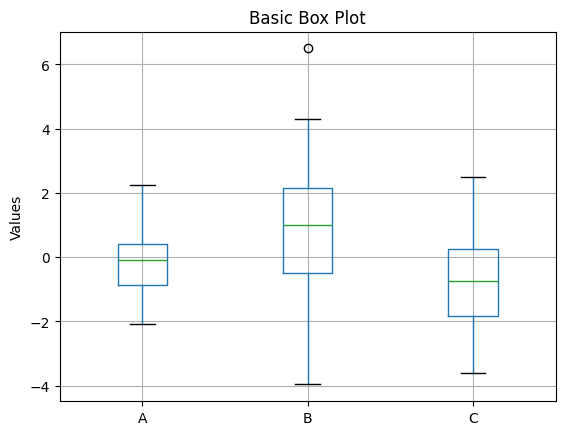

In [19]:
# Create a basic box plot
df.boxplot()
plt.title('Basic Box Plot')
plt.ylabel('Values')
plt.show()

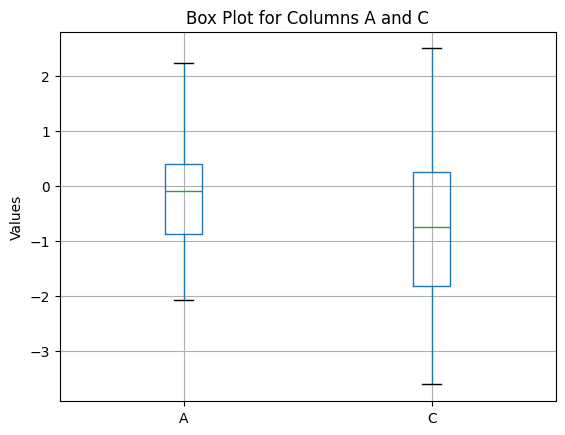

In [20]:
# Create a box plot for specific columns
df.boxplot(column=['A', 'C'])
plt.title('Box Plot for Columns A and C')
plt.ylabel('Values')
plt.show()

In [21]:
# Create a DataFrame with a categorical column
df2 = pd.DataFrame({
    'value': np.concatenate([np.random.normal(0, 1, 50), np.random.normal(2, 1, 50)]),
    'group': np.repeat(['A', 'B'], 50)
})
print("DataFrame with categorical column (first 5 rows):")
df2.head()

DataFrame with categorical column (first 5 rows):


,value,group
0,-0.933860,A
1,1.110183,A
2,1.637705,A
3,0.846078,A
4,-0.014777,A


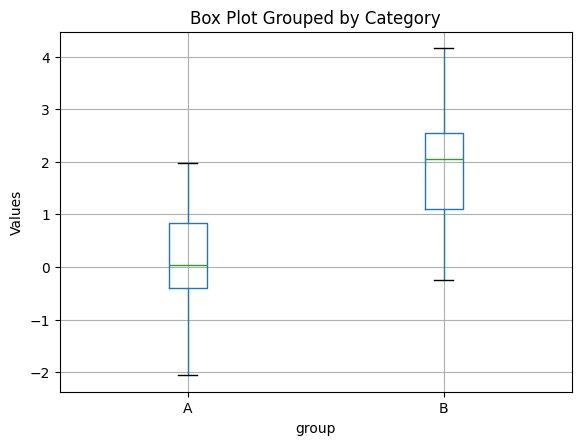

In [22]:
# Create a box plot grouped by a categorical column
df2.boxplot(column='value', by='group')
plt.title('Box Plot Grouped by Category')
plt.suptitle('')  # Remove the default suptitle
plt.ylabel('Values')
plt.show()

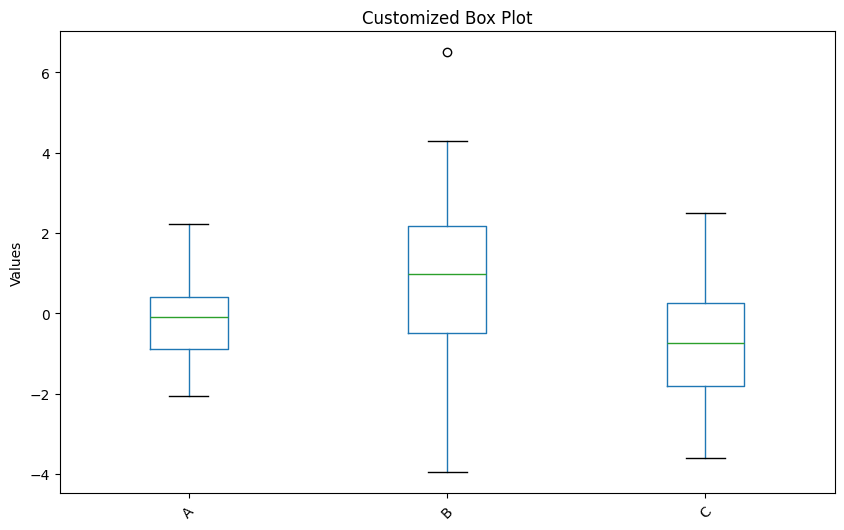

In [23]:
# Customize the box plot
df.boxplot(grid=False, rot=45, fontsize=10, figsize=(10, 6))
plt.title('Customized Box Plot')
plt.ylabel('Values')
plt.show()

##### 5. DataFrame.cummin()

The `cummin()` method returns the cumulative minimum over a DataFrame or Series axis.

In [24]:
# Create a Series with some values
s = pd.Series([2, np.nan, 5, -1, 0])
print("Original Series:")
s

Original Series:


0    2.0
1    NaN
2    5.0
3   -1.0
4    0.0
dtype: float64

In [25]:
# Calculate cumulative minimum (by default, NA values are ignored)
print("Cumulative minimum (skipna=True):")
s.cummin()

Cumulative minimum (skipna=True):


0    2.0
1    NaN
2    2.0
3   -1.0
4   -1.0
dtype: float64

In [26]:
# Calculate cumulative minimum including NA values
print("Cumulative minimum (skipna=False):")
s.cummin(skipna=False)

Cumulative minimum (skipna=False):


0    2.0
1    NaN
2    NaN
3    NaN
4    NaN
dtype: float64

In [27]:
# Create a DataFrame with some values
df = pd.DataFrame([
    [2.0, 1.0],
    [3.0, np.nan],
    [1.0, 0.0]
], columns=list('AB'))
print("Original DataFrame:")
df

Original DataFrame:


,A,B
0,2.0,1.0
1,3.0,NaN
2,1.0,0.0


In [28]:
# Calculate cumulative minimum along index (rows)
print("Cumulative minimum along index (axis=0):")
df.cummin()

Cumulative minimum along index (axis=0):


,A,B
0,2.0,1.0
1,2.0,NaN
2,1.0,0.0


In [29]:
# Calculate cumulative minimum along columns
print("Cumulative minimum along columns (axis=1):")
df.cummin(axis=1)

Cumulative minimum along columns (axis=1):


,A,B
0,2.0,1.0
1,3.0,NaN
2,1.0,0.0


##### 6. DataFrame.cumprod()

The `cumprod()` method returns the cumulative product over a DataFrame or Series axis.

In [30]:
# Using the same Series as above
print("Original Series:")
s

Original Series:


0    2.0
1    NaN
2    5.0
3   -1.0
4    0.0
dtype: float64

In [31]:
# Calculate cumulative product (by default, NA values are ignored)
print("Cumulative product (skipna=True):")
s.cumprod()

Cumulative product (skipna=True):


0     2.0
1     NaN
2    10.0
3   -10.0
4    -0.0
dtype: float64

In [32]:
# Calculate cumulative product including NA values
print("Cumulative product (skipna=False):")
s.cumprod(skipna=False)

Cumulative product (skipna=False):


0    2.0
1    NaN
2    NaN
3    NaN
4    NaN
dtype: float64

In [33]:
# Using the same DataFrame as above
print("Original DataFrame:")
df

Original DataFrame:


,A,B
0,2.0,1.0
1,3.0,NaN
2,1.0,0.0


In [34]:
# Calculate cumulative product along index (rows)
print("Cumulative product along index (axis=0):")
df.cumprod()

Cumulative product along index (axis=0):


,A,B
0,2.0,1.0
1,6.0,NaN
2,6.0,0.0


In [35]:
# Calculate cumulative product along columns
print("Cumulative product along columns (axis=1):")
df.cumprod(axis=1)

Cumulative product along columns (axis=1):


,A,B
0,2.0,2.0
1,3.0,NaN
2,1.0,0.0


In [36]:
# Create a DataFrame with positive and negative values
df2 = pd.DataFrame({
    'A': [1, 2, 3, 4],
    'B': [1, -1, 1, -1]
})
print("DataFrame with positive and negative values:")
print(df2)

print("\nCumulative product:")
print(df2.cumprod())

DataFrame with positive and negative values:
   A  B
0  1  1
1  2 -1
2  3  1
3  4 -1

Cumulative product:
    A  B
0   1  1
1   2 -1
2   6 -1
3  24  1


##### Summary

In this notebook, we've explored several important DataFrame methods:

1. **between_time()**: Selects values between specific times of day from a time-indexed DataFrame
2. **bfill()**: Fills missing values using the next valid observation (backward fill)
3. **bool()**: Returns the boolean value of a single-element DataFrame
4. **boxplot()**: Creates box plots from DataFrame columns for visualizing data distributions
5. **cummin()**: Returns the cumulative minimum over a DataFrame or Series axis
6. **cumprod()**: Returns the cumulative product over a DataFrame or Series axis

These methods are essential for time-based filtering, handling missing data, visualization, and calculating cumulative statistics in pandas.